Importando biblioteca de análise e tratamento de dados - PANDAS -  e  - MatplotLib - criação e edição dos gráficos.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

Estabelecendo conexão entre a base de dados Excel com o Python.

In [2]:
banco_dados_inicial =  pd.read_excel(r'Electric_Vehicle_Population_Data.xlsx')

Printando todas as informações de datatypes da tabela para averiguar o número de linhas e colunas, o tipo de cada coluna e a quantidade de linhas sem dados.

In [3]:
banco_dados_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PLACA                     166800 non-null  object 
 1   PAIS                      166795 non-null  object 
 2   CIDADE                    166795 non-null  object 
 3   ESTADO                    166800 non-null  object 
 4   CODIGO POSTAL             166795 non-null  float64
 5   ANO MODELO                166800 non-null  int64  
 6   MARCA                     166800 non-null  object 
 7   MODELO                    166800 non-null  object 
 8   TIPO DE VEICULO ELETRICO  166800 non-null  object 
 9   CAFV ENERGIA LIMPA        166800 non-null  object 
 10  RANKING ELETRICO          166800 non-null  int64  
 11  Base MSRP                 166800 non-null  int64  
 12  DISTRITO LEGISLATIVO      166440 non-null  float64
 13  ID DO VEICULO             166800 non-null  i

Trocando o nome de uma coluna, para corrigir o erro de tradução da mesma. 

In [4]:
banco_dados_inicial = banco_dados_inicial.rename({'PAIS': 'CONDADO'}, axis = 1)

In [33]:
cidades_com_mais_carros_eletricos = banco_dados_inicial['CIDADE'].value_counts()
print(cidades_com_mais_carros_eletricos.head(8))

Seattle      27831
Bellevue      8364
Redmond       6032
Vancouver     5869
Bothell       5440
Kirkland      5028
Sammamish     4876
Renton        4617
Name: CIDADE, dtype: int64


Printando todos os nomes de marcas diferentes que venderam carros nos EUA e em seguida mostrando de forma decrescente a maior quantidade de carros vendidos por marca.

In [5]:
# printando todas as marcas do BD
nomes_todas_marcas = banco_dados_inicial['MARCA'].unique()
print(nomes_todas_marcas)

# printando todas as marcas do BD com número de vendas em ordem decrescente

frequencia_nomes = banco_dados_inicial['MARCA'].value_counts()
df_frequencia_nomes = pd.DataFrame({'Marca': frequencia_nomes.index, 'Total Carros': frequencia_nomes.values})
df_frequencia_nomes = df_frequencia_nomes.sort_values(by='Total Carros', ascending=False)

print(df_frequencia_nomes)

['FIAT' 'TESLA' 'BMW' 'RIVIAN' 'CHRYSLER' 'CHEVROLET' 'KIA' 'FORD'
 'TOYOTA' 'NISSAN' 'MITSUBISHI' 'HONDA' 'AUDI' 'JEEP' 'VOLVO' 'HYUNDAI'
 'VOLKSWAGEN' 'SUBARU' 'LUCID' 'MINI' 'POLESTAR' 'SMART' 'LINCOLN'
 'MERCEDES-BENZ' 'LEXUS' 'PORSCHE' 'ALFA ROMEO' 'DODGE' 'JAGUAR'
 'CADILLAC' 'LAND ROVER' 'MAZDA' 'GENESIS' 'FISKER' 'GMC' 'TH!NK'
 'WHEEGO ELECTRIC CARS' 'AZURE DYNAMICS' 'BENTLEY']
                   Marca  Total Carros
0                  TESLA         74834
1                 NISSAN         13848
2              CHEVROLET         13072
3                   FORD          8577
4                    BMW          7196
5                    KIA          6995
6                 TOYOTA          5812
7             VOLKSWAGEN          4717
8                   JEEP          4100
9                HYUNDAI          4057
10                 VOLVO          3962
11                RIVIAN          3554
12                  AUDI          3464
13              CHRYSLER          2878
14         MERCEDES-BENZ  

Separando as 5 marcas com maior número de vendas para descobrir: Modelos mais vendidos, Ano em que foram mais vendidos carros, Cidade onde mais carros foram vendidos.

,CIDADE,ESTADO,CONDADO,MODELO,ANO MODELO
1,Olympia,WA,Thurston,MODEL X,2017
4,Kent,WA,King,MODEL 3,2020
8,Port Orchard,WA,Kitsap,MODEL 3,2018
10,Olympia,WA,Thurston,MODEL Y,2023
12,Seattle,WA,King,MODEL Y,2020
...,...,...,...,...,...
166786,Redmond,WA,King,MODEL 3,2022
166788,East Wenatchee,WA,Douglas,MODEL 3,2018
166796,Sammamish,WA,King,MODEL Y,2021
166797,Mukilteo,WA,Snohomish,MODEL Y,2022


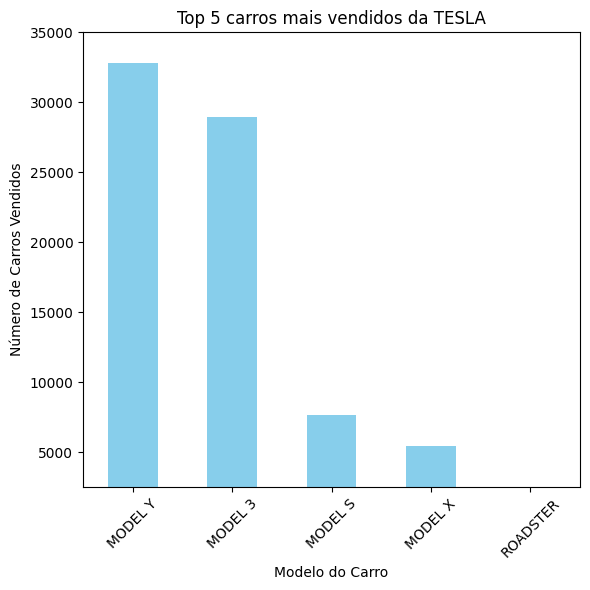

MODEL Y     32822
MODEL 3     28926
MODEL S      7611
MODEL X      5429
ROADSTER       46
Name: MODELO, dtype: int64


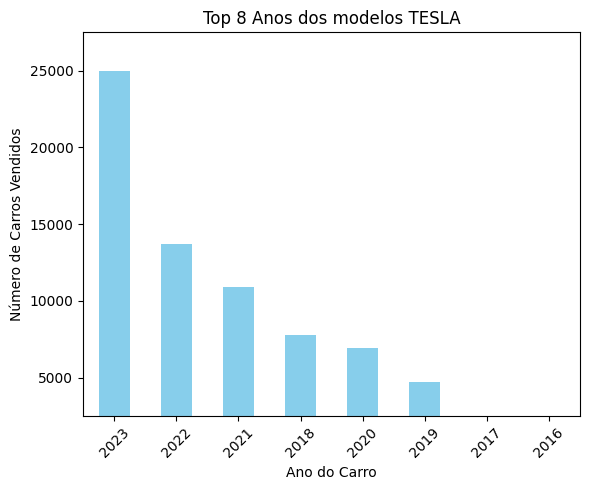

2023    24979
2022    13707
2021    10890
2018     7753
2020     6955
2019     4714
2017     1607
2016     1587
2015     1082
2013      746
2014      644
2012      124
2008       20
2010       20
2011        6
Name: ANO MODELO, dtype: int64


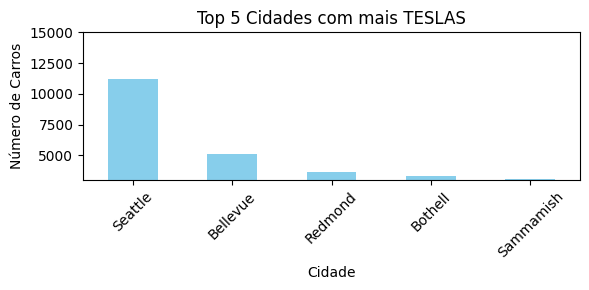

Seattle      11163
Bellevue      5130
Redmond       3642
Bothell       3280
Sammamish     3090
Name: CIDADE, dtype: int64


In [6]:
# criando novo banco de dados com somente a marca Tesla e copiando o restante dos dados considerados importantes para a análise.
tesla = banco_dados_inicial[banco_dados_inicial['MARCA'] == 'TESLA']
banco_tesla = tesla[['CIDADE', 'ESTADO', 'CONDADO', 'MODELO', 'ANO MODELO']].copy()
display(banco_tesla)

# fazendo contagem de modelos e gerando gráfico e printando a quantidade por cada modelo
qtd_modelo = banco_tesla['MODELO'].value_counts()

top_5_modelos = qtd_modelo.head(5)
top_5_modelos.plot(kind='bar', figsize=(6, 6), color='skyblue')

plt.ylim(2500, 35000)
plt.title('Top 5 carros mais vendidos da TESLA')
plt.xlabel('Modelo do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_modelo)

# fazendo contagem de vendas da marca por ano, gerando gráfico e printando a quantidade vendida por ano
qtd_por_ano = banco_tesla['ANO MODELO'].value_counts()

top_5_anos = qtd_por_ano.head(8)
top_5_anos.plot(kind='bar', figsize=(6, 5), color='skyblue')

plt.ylim(2500, 27500)
plt.title('Top 8 Anos dos modelos TESLA')
plt.xlabel('Ano do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_por_ano)

# fazendo contagem de vendas por cidade, gerando gráfico e printando a quantidade vendida nas top 5 cidades
qtd_por_cidade = banco_tesla['CIDADE'].value_counts()

top_5_cidades_tesla = qtd_por_cidade.head(5)
plt.ylim(3000, 15000)

top_5_cidades_tesla.plot(kind='bar', figsize=(6, 3), color='skyblue')
plt.title('Top 5 Cidades com mais TESLAS')
plt.xlabel('Cidade')
plt.ylabel('Número de Carros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_5_cidades_tesla)


,CIDADE,ESTADO,CONDADO,MODELO,ANO MODELO
20,Poulsbo,WA,Kitsap,LEAF,2013
40,Lacey,WA,Thurston,LEAF,2020
44,Poulsbo,WA,Kitsap,LEAF,2018
46,Shoreline,WA,King,LEAF,2015
51,Olympia,WA,Thurston,LEAF,2013
...,...,...,...,...,...
166763,Spokane,WA,Spokane,LEAF,2011
166774,Port Angeles,WA,Clallam,LEAF,2012
166775,Bellingham,WA,Whatcom,LEAF,2015
166785,Silverdale,WA,Kitsap,LEAF,2019


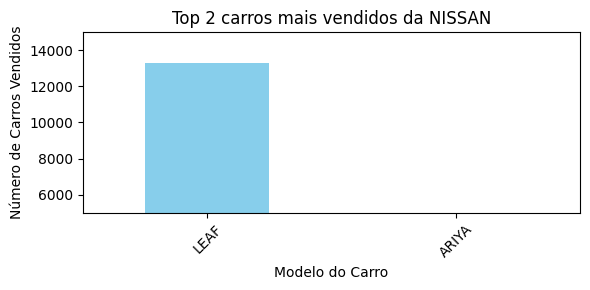

LEAF     13274
ARIYA      574
Name: MODELO, dtype: int64


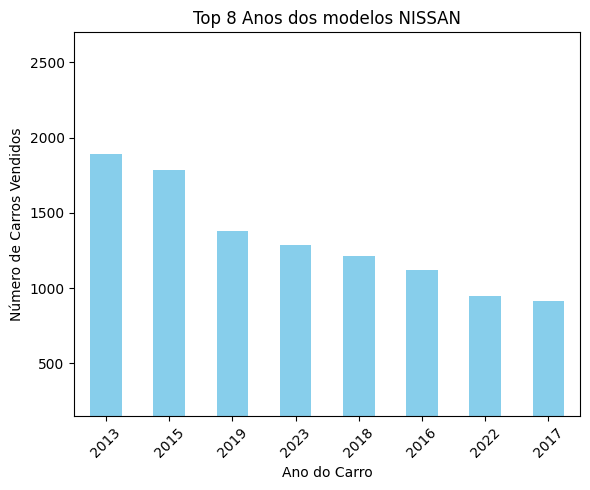

2013    1891
2015    1785
2019    1376
2023    1286
2018    1210
2016    1120
2022     948
2017     915
2011     690
2021     687
2020     686
2014     646
2012     567
2024      41
Name: ANO MODELO, dtype: int64


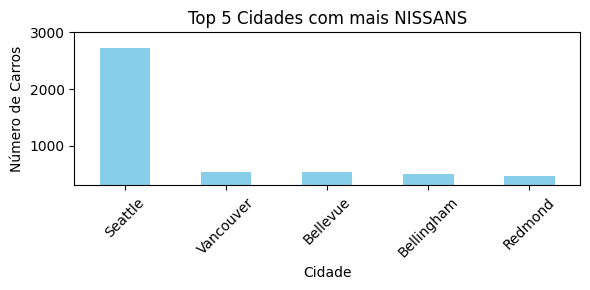

Seattle       2723
Vancouver      541
Bellevue       532
Bellingham     503
Redmond        466
Name: CIDADE, dtype: int64


In [7]:
# criando novo banco de dados com somente a marca Nissan e copiando o restante dos dados considerados importantes para a análise.
nissan = banco_dados_inicial[banco_dados_inicial['MARCA'] == 'NISSAN']
banco_nissan = nissan[['CIDADE', 'ESTADO', 'CONDADO', 'MODELO', 'ANO MODELO']].copy()
display(banco_nissan)

# fazendo contagem de modelos e gerando gráfico e printando a quantidade por cada modelo
qtd_modelo = banco_nissan['MODELO'].value_counts()

top_5_modelos = qtd_modelo.head(5)
top_5_modelos.plot(kind='bar', figsize=(6, 3), color='skyblue')

plt.ylim(5000, 15000)
plt.title('Top 2 carros mais vendidos da NISSAN')
plt.xlabel('Modelo do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_modelo)

# fazendo contagem de vendas da marca por ano, gerando gráfico e printando a quantidade vendida por ano
qtd_por_ano = banco_nissan['ANO MODELO'].value_counts()

top_5_anos = qtd_por_ano.head(8)
top_5_anos.plot(kind='bar', figsize=(6, 5), color='skyblue')

plt.ylim(150, 2700)
plt.title('Top 8 Anos dos modelos NISSAN')
plt.xlabel('Ano do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_por_ano)

# fazendo contagem de vendas por cidade, gerando gráfico e printando a quantidade vendida nas top 5 cidades
qtd_por_cidade = banco_nissan['CIDADE'].value_counts()
top_5_cidades_nissan = qtd_por_cidade.head(5)

plt.ylim(300, 3000)

top_5_cidades_nissan.plot(kind='bar', figsize=(6, 3), color='skyblue')
plt.title('Top 5 Cidades com mais NISSANS')
plt.xlabel('Cidade')
plt.ylabel('Número de Carros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_5_cidades_nissan)



,CIDADE,ESTADO,CONDADO,MODELO,ANO MODELO
7,Poulsbo,WA,Kitsap,BOLT EV,2017
19,Poulsbo,WA,Kitsap,VOLT,2018
23,Brier,WA,Snohomish,BOLT EV,2020
34,Edmonds,WA,Snohomish,VOLT,2013
38,Bothell,WA,Snohomish,VOLT,2014
...,...,...,...,...,...
166685,Mount Vernon,WA,Skagit,VOLT,2015
166701,Monroe,WA,Snohomish,BOLT EV,2022
166737,Kirkland,WA,King,BOLT EUV,2023
166776,Greenacres,WA,Spokane,BOLT EV,2020


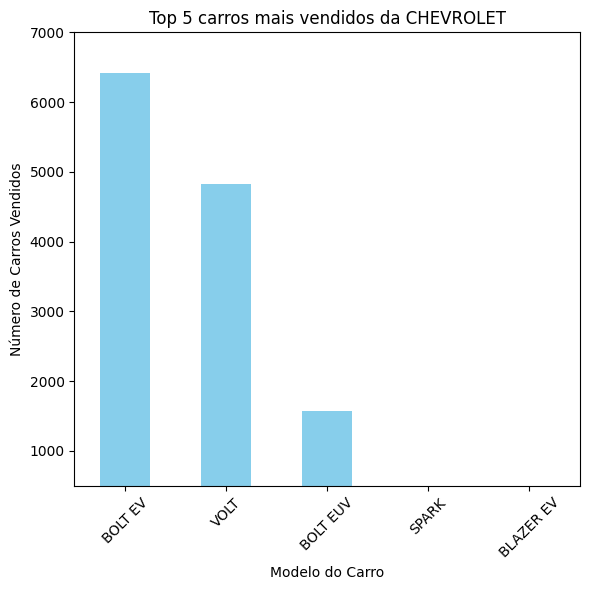

BOLT EV         6413
VOLT            4825
BOLT EUV        1570
SPARK            246
BLAZER EV         12
SILVERADO EV       5
S-10 PICKUP        1
Name: MODELO, dtype: int64


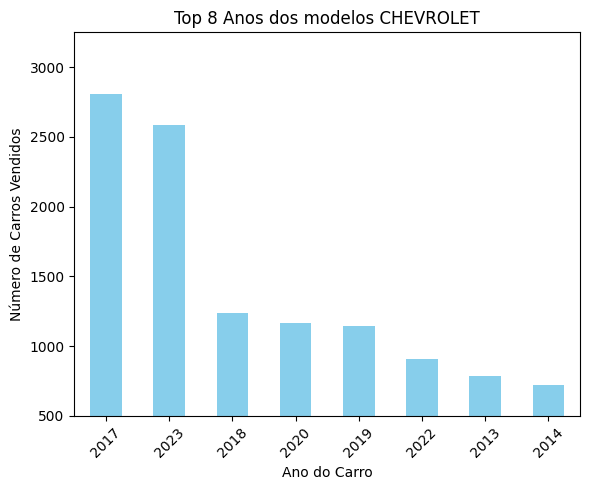

2017    2805
2023    2588
2018    1239
2020    1165
2019    1142
2022     905
2013     786
2014     718
2012     485
2015     456
2021     381
2016     308
2011      76
2024      17
1997       1
Name: ANO MODELO, dtype: int64


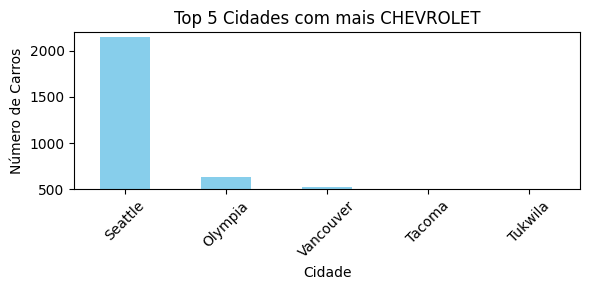

Seattle      2154
Olympia       630
Vancouver     521
Tacoma        356
Tukwila       319
Name: CIDADE, dtype: int64


In [8]:
# criando novo banco de dados com somente a marca Chevrolet e copiando o restante dos dados considerados importantes para a análise.
chevrolet = banco_dados_inicial[banco_dados_inicial['MARCA'] == 'CHEVROLET']
banco_chevrolet = chevrolet[['CIDADE', 'ESTADO', 'CONDADO', 'MODELO', 'ANO MODELO']].copy()
display(banco_chevrolet)

# fazendo contagem de modelos e gerando gráfico e printando a quantidade por cada modelo
qtd_modelo = banco_chevrolet['MODELO'].value_counts()

top_5_modelos = qtd_modelo.head(5)
top_5_modelos.plot(kind='bar', figsize=(6, 6), color='skyblue')

plt.ylim(500, 7000)
plt.title('Top 5 carros mais vendidos da CHEVROLET')
plt.xlabel('Modelo do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_modelo)

# fazendo contagem de vendas da marca por ano, gerando gráfico e printando a quantidade vendida por ano
qtd_por_ano = banco_chevrolet['ANO MODELO'].value_counts()

top_5_anos = qtd_por_ano.head(8)
top_5_anos.plot(kind='bar', figsize=(6, 5), color='skyblue')

plt.ylim(500, 3250)
plt.title('Top 8 Anos dos modelos CHEVROLET')
plt.xlabel('Ano do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_por_ano)

# fazendo contagem de vendas por cidade, gerando gráfico e printando a quantidade vendida nas top 5 cidades
qtd_por_cidade = banco_chevrolet['CIDADE'].value_counts()
top_5_cidades_chevrolet = qtd_por_cidade.head(5)

plt.ylim(500, 2200)
top_5_cidades_chevrolet.plot(kind='bar', figsize=(6, 3), color='skyblue')
plt.title('Top 5 Cidades com mais CHEVROLET')
plt.xlabel('Cidade')
plt.ylabel('Número de Carros')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print(top_5_cidades_chevrolet)



,CIDADE,ESTADO,CONDADO,MODELO,ANO MODELO
13,Bremerton,WA,Kitsap,FUSION,2020
69,Everett,WA,Snohomish,FUSION,2017
75,Lynnwood,WA,Snohomish,C-MAX,2015
119,Moses Lake,WA,Grant,FUSION,2014
148,Mount Vernon,WA,Skagit,FUSION,2015
...,...,...,...,...,...
166714,Kennewick,WA,Benton,ESCAPE,2023
166730,Orondo,WA,Douglas,MUSTANG MACH-E,2022
166739,Arlington,WA,Snohomish,F-150,2023
166759,Vancouver,WA,Clark,MUSTANG MACH-E,2023


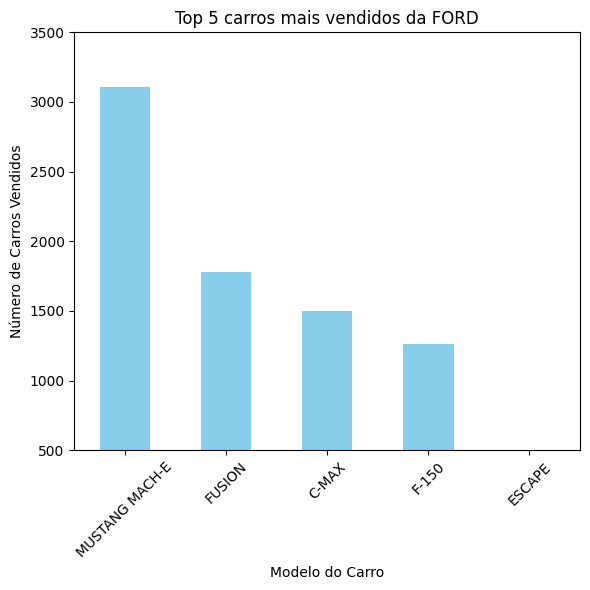

MUSTANG MACH-E    3107
FUSION            1778
C-MAX             1502
F-150             1260
ESCAPE             377
TRANSIT            306
FOCUS              236
RANGER              11
Name: MODELO, dtype: int64


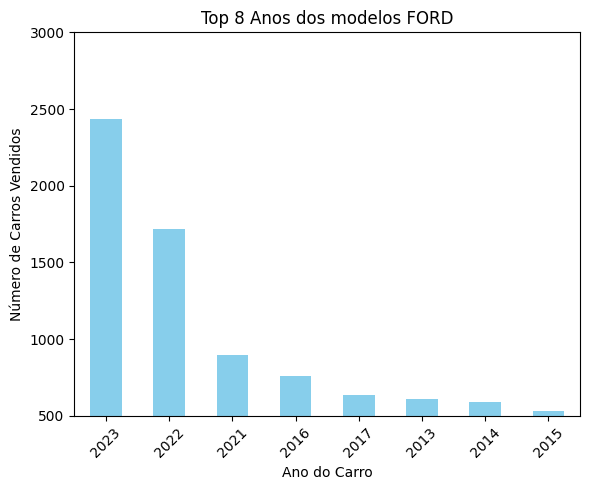

2023    2434
2022    1716
2021     900
2016     757
2017     637
2013     607
2014     589
2015     530
2018     164
2019     148
2020      72
2012      12
2000       7
1999       3
1998       1
Name: ANO MODELO, dtype: int64


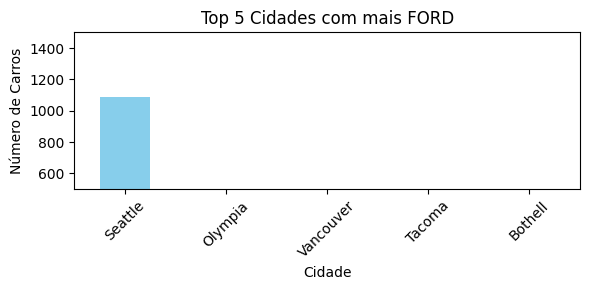

Seattle      1086
Olympia       363
Vancouver     355
Tacoma        264
Bothell       204
Name: CIDADE, dtype: int64


In [9]:
# criando novo banco de dados com somente a marca Ford e copiando o restante dos dados considerados importantes para a análise.
ford = banco_dados_inicial[banco_dados_inicial['MARCA'] == 'FORD']
banco_ford = ford[['CIDADE', 'ESTADO', 'CONDADO', 'MODELO', 'ANO MODELO']].copy()
display(banco_ford)

# fazendo contagem de modelos e gerando gráfico e printando a quantidade por cada modelo
qtd_modelo = banco_ford['MODELO'].value_counts()

top_5_modelos = qtd_modelo.head(5)
top_5_modelos.plot(kind='bar', figsize=(6, 6), color='skyblue')

plt.ylim(500, 3500)
plt.title('Top 5 carros mais vendidos da FORD')
plt.xlabel('Modelo do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_modelo)

# fazendo contagem de vendas da marca por ano, gerando gráfico e printando a quantidade vendida por ano
qtd_por_ano = banco_ford['ANO MODELO'].value_counts()

top_5_anos = qtd_por_ano.head(8)
top_5_anos.plot(kind='bar', figsize=(6, 5), color='skyblue')

plt.ylim(500, 3000)
plt.title('Top 8 Anos dos modelos FORD')
plt.xlabel('Ano do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_por_ano)

# fazendo contagem de vendas por cidade, gerando gráfico e printando a quantidade vendida nas top 5 cidades
qtd_por_cidade = banco_ford['CIDADE'].value_counts()
top_5_cidades_ford = qtd_por_cidade.head(5)

plt.ylim(500, 1500)
top_5_cidades_ford.plot(kind='bar', figsize=(6, 3), color='skyblue')
plt.title('Top 5 Cidades com mais FORD')
plt.xlabel('Cidade')
plt.ylabel('Número de Carros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_5_cidades_ford)



,CIDADE,ESTADO,CONDADO,MODELO,ANO MODELO
2,Renton,WA,King,330E,2023
5,Poulsbo,WA,Kitsap,X5,2024
9,Duvall,WA,King,I3,2018
14,Seattle,WA,King,I3,2016
15,Seattle,WA,King,X5,2024
...,...,...,...,...,...
166662,Issaquah,WA,King,X5,2023
166692,Seattle,WA,King,X5,2017
166699,Lynnwood,WA,Snohomish,I3,2020
166713,South Hill,WA,Pierce,X5,2023


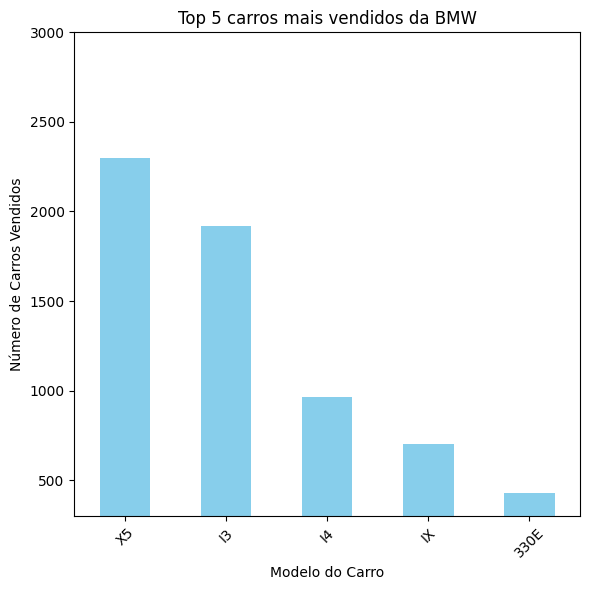

X5       2301
I3       1919
I4        967
IX        701
330E      431
530E      411
X3        304
I8         86
740E       32
I5         24
745E       10
I7          6
745LE       2
XM          2
Name: MODELO, dtype: int64


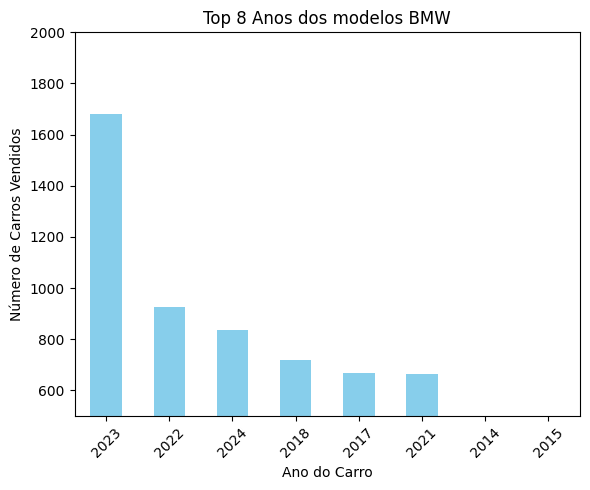

2023    1680
2022     924
2024     836
2018     720
2017     667
2021     663
2014     441
2015     391
2016     374
2019     325
2020     175
Name: ANO MODELO, dtype: int64


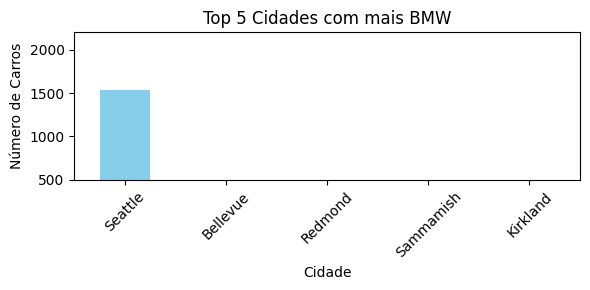

Seattle      1537
Bellevue      448
Redmond       290
Sammamish     276
Kirkland      273
Name: CIDADE, dtype: int64


In [10]:
# criando novo banco de dados com somente a marca BMW e copiando o restante dos dados considerados importantes para a análise.
bmw = banco_dados_inicial[banco_dados_inicial['MARCA'] == 'BMW']
banco_bmw = bmw[['CIDADE', 'ESTADO', 'CONDADO', 'MODELO', 'ANO MODELO']].copy()
display(banco_bmw)

# fazendo contagem de modelos e gerando gráfico e printando a quantidade por cada modelo
qtd_modelo = banco_bmw['MODELO'].value_counts()

top_5_modelos = qtd_modelo.head(5)
top_5_modelos.plot(kind='bar', figsize=(6, 6), color='skyblue')

plt.ylim(300, 3000)
plt.title('Top 5 carros mais vendidos da BMW')
plt.xlabel('Modelo do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_modelo)

# fazendo contagem de vendas da marca por ano, gerando gráfico e printando a quantidade vendida por ano
qtd_por_ano = banco_bmw['ANO MODELO'].value_counts()

top_5_anos = qtd_por_ano.head(8)
top_5_anos.plot(kind='bar', figsize=(6, 5), color='skyblue')

plt.ylim(500, 2000)
plt.title('Top 8 Anos dos modelos BMW')
plt.xlabel('Ano do Carro')
plt.ylabel('Número de Carros Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(qtd_por_ano)

# fazendo contagem de vendas por cidade, gerando gráfico e printando a quantidade vendida nas top 5 cidades
qtd_por_cidade = banco_bmw['CIDADE'].value_counts()
top_5_cidades_bmw = qtd_por_cidade.head(5)

plt.ylim(500, 2200)

top_5_cidades_bmw.plot(kind='bar', figsize=(6, 3), color='skyblue')
plt.title('Top 5 Cidades com mais BMW')
plt.xlabel('Cidade')
plt.ylabel('Número de Carros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_5_cidades_bmw)



Guardando valores de vendas por ano de cada marca, e vendas de marca por cidade, para depois fazer gráfico final comparativo entre cada uma delas.

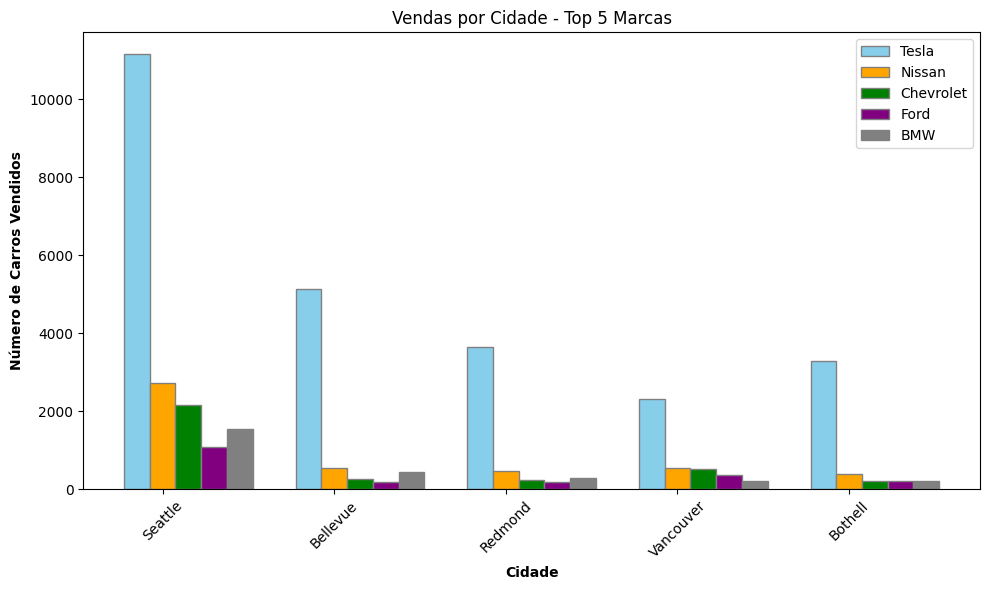

In [40]:
# Selecionando as cidades com maiores números de carros vendidos, e relacionando as principais marcas que venderam nessas cidades
cidades_com_mais_carros_eletricos = banco_dados_inicial['CIDADE'].value_counts().head(5)
tesla_cidades = banco_tesla[banco_tesla['CIDADE'].isin(cidades_com_mais_carros_eletricos.index)]['CIDADE'].value_counts().reindex(cidades_com_mais_carros_eletricos.index, fill_value=0)
nissan_cidades = banco_nissan[banco_nissan['CIDADE'].isin(cidades_com_mais_carros_eletricos.index)]['CIDADE'].value_counts().reindex(cidades_com_mais_carros_eletricos.index, fill_value=0)
chevrolet_cidades = banco_chevrolet[banco_chevrolet['CIDADE'].isin(cidades_com_mais_carros_eletricos.index)]['CIDADE'].value_counts().reindex(cidades_com_mais_carros_eletricos.index, fill_value=0)
ford_cidades = banco_ford[banco_ford['CIDADE'].isin(cidades_com_mais_carros_eletricos.index)]['CIDADE'].value_counts().reindex(cidades_com_mais_carros_eletricos.index, fill_value=0)
bmw_cidades = banco_bmw[banco_bmw['CIDADE'].isin(cidades_com_mais_carros_eletricos.index)]['CIDADE'].value_counts().reindex(cidades_com_mais_carros_eletricos.index, fill_value=0)

plt.figure(figsize=(10, 6))

barWidth = 0.15

# Posições das barras
r1 = range(len(tesla_cidades))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Plotagem das barras
plt.bar(r1, tesla_cidades, color='skyblue', width=barWidth, edgecolor='grey', label='Tesla')
plt.bar(r2, nissan_cidades, color='orange', width=barWidth, edgecolor='grey', label='Nissan')
plt.bar(r3, chevrolet_cidades, color='green', width=barWidth, edgecolor='grey', label='Chevrolet')
plt.bar(r4, ford_cidades, color='purple', width=barWidth, edgecolor='grey', label='Ford')
plt.bar(r5, bmw_cidades, color='gray', width=barWidth, edgecolor='grey', label='BMW')

# Configurações adicionais do gráfico
plt.xlabel('Cidade', fontweight='bold')
plt.ylabel('Número de Carros Vendidos', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(tesla_cidades))], cidades_com_mais_carros_eletricos.index)
plt.title('Vendas por Cidade - Top 5 Marcas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


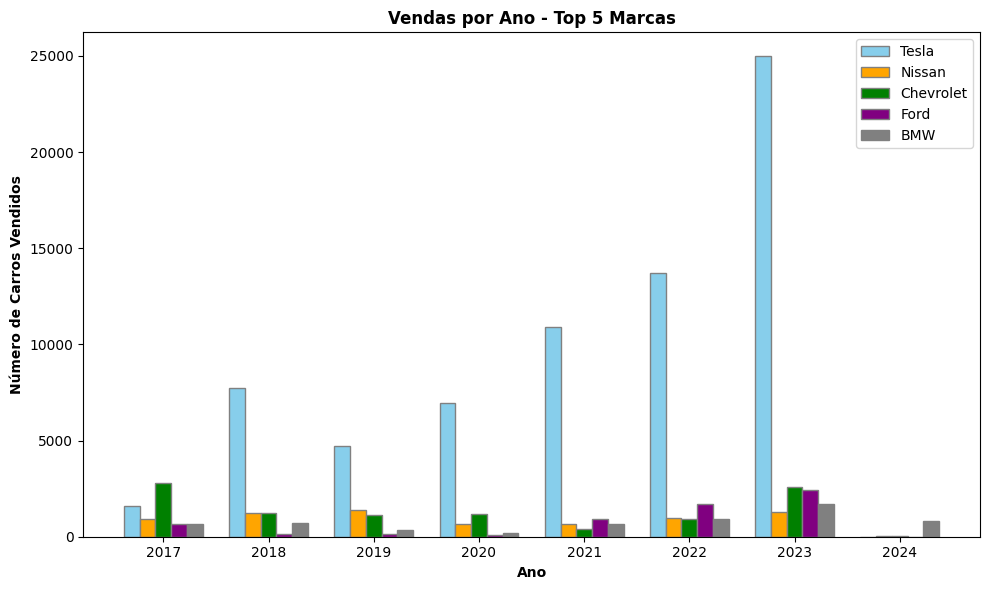

In [12]:

# Define os anos de venda
anos_de_venda = range(2017, 2025)

# Dados de vendas por ano para cada marca
tesla_por_ano = banco_tesla['ANO MODELO'].value_counts().reindex(anos_de_venda, fill_value=0)
nissan_por_ano = banco_nissan['ANO MODELO'].value_counts().reindex(anos_de_venda, fill_value=0)
chevrolet_por_ano = banco_chevrolet['ANO MODELO'].value_counts().reindex(anos_de_venda, fill_value=0)
ford_por_ano = banco_ford['ANO MODELO'].value_counts().reindex(anos_de_venda, fill_value=0)
bmw_por_ano = banco_bmw['ANO MODELO'].value_counts().reindex(anos_de_venda, fill_value=0)

plt.figure(figsize=(10, 6))
barWidth = 0.15

# Posições das barras
r1 = range(len(anos_de_venda))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Plotagem das barras
plt.bar(r1, tesla_por_ano, color='skyblue', width=barWidth, edgecolor='grey', label='Tesla')
plt.bar(r2, nissan_por_ano, color='orange', width=barWidth, edgecolor='grey', label='Nissan')
plt.bar(r3, chevrolet_por_ano, color='green', width=barWidth, edgecolor='grey', label='Chevrolet')
plt.bar(r4, ford_por_ano, color='purple', width=barWidth, edgecolor='grey', label='Ford')
plt.bar(r5, bmw_por_ano, color='gray', width=barWidth, edgecolor='grey', label='BMW')

# Configurações adicionais do gráfico
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Número de Carros Vendidos', fontweight='bold')
plt.title('Vendas por Ano - Top 5 Marcas', fontweight='bold')
plt.xticks([r + 2 * barWidth for r in range(len(anos_de_venda))], anos_de_venda)
plt.legend()
plt.tight_layout()
plt.show()


Conclusões finais considerando a análise após pesquisas: 

A cidade com mais carros elétricos: SEATTLE
- Seattle lidera as vendas de Teslas nos EUA devido à sua cultura ambientalmente consciente, infraestrutura de carregamento desenvolvida, alta renda e educação da população, 
incentivos governamentais e à presença marcante da Tesla na região. 

A marca com maiores quantidades de vendas nos EUA: TESLA
- A Tesla se destaca nas vendas de carros elétricos devido à sua inovação tecnológica, marca forte, rede de carregamento extensa, design atraente e compromisso com a sustentabilidade. 
Para garantir seu crescimento contínuo, a empresa deve focar na expansão da linha de produtos, melhorar a infraestrutura de carregamento, avançar em tecnologias de bateria, expandir globalmente e continuar inovando para manter sua liderança de mercado. 
Estes são os pilares essenciais para o sucesso duradouro da Tesla no mercado automotivo.

Aumento de vendas de carros elétricos ao longo dos anos: 
- O aumento expressivo nas vendas de carros elétricos pode ser atribuído a diversos fatores, incluindo principalmente avanços tecnológicos, desenvolvimento da infraestrutura de carregamento, crescente consciência ambiental, manor custo de impostos, menores custos de gasolina. 
Incentivos governamentais, preocupações com a saúde pública e mudanças nas preferências do consumidor também desempenham papéis importantes. Esses elementos combinados impulsionaram a adoção de veículos elétricos.